In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data= pd.read_csv('apartments_rent_pl_2024_06.csv')

 Let’s take a quick look at the dataframe description.

Data Fields

•  city - the name of the city where the property is located

•  type - type of the building

•  squareMeters - the size of the apartment in square meters

•  rooms - number of rooms in the apartment

•  floor / floorCount - the floor where the apartment is located and the total number of floors in the building

•  buildYear - the year when the building was built

•  latitude, longitude - geo coordinate of the property

•  centreDistance - distance from the city centre in km

• poiCount - number of points of interest in 500m range from the apartment (schools, clinics, post offices, kindergartens, restaurants, colleges,
   pharmacies)

• [poiName]Distance - distance to the nearest point of interest (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)

•  ownership - the type of property ownership

•  condition - the condition of the apartment

• has[features] - whether the property has key features such as assigned parking space, balcony, elevator, security, storage room

•  price - offer price in Polish Zloty

In [5]:
data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,727a1427f156535fc0531e59a27e7988,szczecin,blockOfFlats,34.0,1.0,2.0,3.0,NaN,53.394002,14.523988,...,0.481,condominium,NaN,premium,no,yes,no,no,yes,1700
1,a640ac5f62cce4d6806a7b7d73b5cd52,szczecin,apartmentBuilding,39.0,2.0,5.0,7.0,2022.0,53.404646,14.492033,...,0.546,condominium,brick,premium,yes,yes,yes,no,no,3400
2,40cb3c6185236a3e4f136641ab7099a4,szczecin,apartmentBuilding,47.0,2.0,4.0,12.0,2016.0,53.438231,14.562027,...,0.331,condominium,brick,premium,yes,yes,yes,yes,yes,2700
3,4f9fd13b91ba19534fc3db3fc93fa392,szczecin,blockOfFlats,28.0,1.0,4.0,4.0,2017.0,53.429461,14.552017,...,0.137,condominium,brick,premium,no,no,yes,no,no,2300
4,f14a3f2d0d1d1a8ec896e9587d2c9760,szczecin,blockOfFlats,46.7,2.0,3.0,3.0,1996.0,53.450800,14.556700,...,0.271,condominium,NaN,NaN,yes,yes,no,no,no,1850


In [6]:
data.shape

(8849, 28)

I got 8849 rows with 28 features. The currency is PLN (Polish Złoty). There are  categorical, so I will need to use Encoder to encode values so that they were numbers.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8849 entries, 0 to 8848
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8849 non-null   object 
 1   city                  8849 non-null   object 
 2   type                  7019 non-null   object 
 3   squareMeters          8849 non-null   float64
 4   rooms                 8849 non-null   float64
 5   floor                 7796 non-null   float64
 6   floorCount            8694 non-null   float64
 7   buildYear             6600 non-null   float64
 8   latitude              8849 non-null   float64
 9   longitude             8849 non-null   float64
 10  centreDistance        8849 non-null   float64
 11  poiCount              8849 non-null   float64
 12  schoolDistance        8849 non-null   float64
 13  clinicDistance        8845 non-null   float64
 14  postOfficeDistance    8846 non-null   float64
 15  kindergartenDistance 

In [9]:
data= data.rename(columns={"squareMeters": "square_meters"})

In [10]:
data= data.rename(columns={"floorCount": "floor_count"})

In [11]:
data= data.rename(columns={"buildYear": "build_year"})

In [12]:
data= data.rename(columns={"centreDistance": "centre_dist"})

In [13]:
data= data.rename(columns={"centreDistance": "centre_distance"})

In [14]:
data= data.rename(columns={"poiCount": "poi_count"})

In [15]:
data= data.rename(columns={"schoolDistance": "school_dist"})

In [16]:
data= data.rename(columns={"clinicDistance": "clinic_dist"})

In [17]:
data= data.rename(columns={"postOfficeDistance": "post_office_dist"})

In [18]:
data= data.rename(columns={"kindergartenDistance": "kindergarten_dist"})

In [19]:
data= data.rename(columns={"restaurantDistance": "restaurant_dist"})

In [20]:
data= data.rename(columns={"collegeDistance": "college_dist"})

In [21]:
data= data.rename(columns={"pharmacyDistance": "pharmacy_dist"})

In [22]:
data= data.rename(columns={"buildingMaterial": "building_material"})

In [23]:
data= data.rename(columns={"hasParkingSpace": "has_parking_space"})

In [24]:
data= data.rename(columns={"hasBalcony": "has_balcony"})

In [25]:
data= data.rename(columns={"hasElevator": "has_elevator"})

In [26]:
data= data.rename(columns={"hasSecurity": "has_security"})

In [27]:
data= data.rename(columns={"hasStorageRoom": "has_storage_room"})

In [28]:
# Check for missing values
missing_counts=data.isnull().sum()
print("Missing values in each column:")
print(missing_counts)

Missing values in each column:
id                      0
city                    0
type                 1830
square_meters           0
rooms                   0
floor                1053
floor_count           155
build_year           2249
latitude                0
longitude               0
centre_dist             0
poi_count               0
school_dist             0
clinic_dist             4
post_office_dist        3
kindergarten_dist       3
restaurant_dist        16
college_dist          112
pharmacy_dist           7
ownership               0
building_material    3505
condition            6329
has_parking_space       0
has_balcony             0
has_elevator          496
has_security            0
has_storage_room        0
price                   0
dtype: int64


In [29]:
# Replace missing categorical values with mode
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

In [30]:
# Replace missing numeric values with median
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

In [31]:
missing_counts=data.isnull().sum()
print("Missing values in each column:")
print(missing_counts)

Missing values in each column:
id                   0
city                 0
type                 0
square_meters        0
rooms                0
floor                0
floor_count          0
build_year           0
latitude             0
longitude            0
centre_dist          0
poi_count            0
school_dist          0
clinic_dist          0
post_office_dist     0
kindergarten_dist    0
restaurant_dist      0
college_dist         0
pharmacy_dist        0
ownership            0
building_material    0
condition            0
has_parking_space    0
has_balcony          0
has_elevator         0
has_security         0
has_storage_room     0
price                0
dtype: int64


In [32]:
data.describe()

,square_meters,rooms,floor,floor_count,build_year,latitude,longitude,centre_dist,poi_count,school_dist,clinic_dist,post_office_dist,kindergarten_dist,restaurant_dist,college_dist,pharmacy_dist,price
count,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000
mean,54.102354,2.341621,3.313143,5.576675,2001.157193,51.651059,19.699421,3.812791,25.291558,0.370262,0.780508,0.471848,0.326606,0.262404,1.262373,0.309842,3704.230196
std,22.514152,0.866826,2.356441,3.217869,27.085242,1.125079,1.673343,2.624373,27.717714,0.333363,0.730913,0.384894,0.307060,0.303971,1.013376,0.312380,2318.653411
min,25.000000,1.000000,1.000000,1.000000,1856.000000,49.984145,14.476723,0.020000,0.000000,0.006000,0.006000,0.002000,0.001000,0.001000,0.005000,0.001000,415.000000
25%,39.000000,2.000000,2.000000,4.000000,2002.000000,50.279167,18.980582,1.750000,9.000000,0.175000,0.309000,0.235000,0.155000,0.088000,0.509000,0.139000,2400.000000
50%,48.600000,2.000000,3.000000,5.000000,2010.000000,52.164600,19.956629,3.290000,17.000000,0.286000,0.540000,0.389000,0.261000,0.182000,0.948000,0.236000,3000.000000
75%,62.000000,3.000000,4.000000,7.000000,2018.000000,52.240917,21.006650,5.320000,30.000000,0.450000,0.962000,0.592000,0.403000,0.335000,1.752000,0.381000,4000.000000
max,150.000000,6.000000,20.000000,29.000000,2024.000000,54.566860,23.193258,16.610000,210.000000,4.643000,4.990000,4.939000,4.580000,4.961000,4.985000,4.836000,19500.000000


The one thing that’s worth noticing might be that 75% of the data has a price of 4000 PLN, when the maximum is 19500 PLN. That might mean there are some outliers in the dataset.

In [34]:
data.describe(include=object)

,id,city,type,ownership,building_material,condition,has_parking_space,has_balcony,has_elevator,has_security,has_storage_room
count,8849,8849,8849,8849,8849,8849,8849,8849,8849,8849,8849
unique,8849,15,3,1,2,2,2,2,2,2,2
top,727a1427f156535fc0531e59a27e7988,warszawa,apartmentBuilding,condominium,brick,premium,no,yes,yes,no,no
freq,1,3393,4851,8849,8425,8817,5208,5448,6132,7518,7402


In [35]:
data.drop(["id", "ownership"],axis=1, inplace=True)

In [36]:
#for col in data.columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90, fontsize=10)
    plt.show()

IndentationError: unexpected indent (2673512301.py, line 2)

In [ ]:
# Plotting the relationship (distribution) between rooms and price using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rooms', y='price', data=data)
plt.title('Distribution of Rooms vs Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
sns.scatterplot(x='square_meters', y='price', data=data)

##  labelencoder ##

Use label encoding for categorical features like city, type, ownership, etc.

In [51]:
# Encoding categorical features
le = LabelEncoder()

In [52]:
for column in data.select_dtypes(include = object).columns.tolist():
    data[column] = le.fit_transform(data[column])

In [53]:
data.head()

,city,type,square_meters,rooms,floor,floor_count,build_year,latitude,longitude,centre_dist,...,college_dist,pharmacy_dist,building_material,condition,has_parking_space,has_balcony,has_elevator,has_security,has_storage_room,price
0,12,1,34.0,1.0,2.0,3.0,2010.0,53.394002,14.523988,4.09,...,2.916,0.481,0,1,0,1,0,0,1,1700
1,12,0,39.0,2.0,5.0,7.0,2022.0,53.404646,14.492033,5.02,...,3.119,0.546,0,1,1,1,1,0,0,3400
2,12,0,47.0,2.0,4.0,12.0,2016.0,53.438231,14.562027,1.65,...,0.988,0.331,0,1,1,1,1,1,1,2700
3,12,1,28.0,1.0,4.0,4.0,2017.0,53.429461,14.552017,0.90,...,0.565,0.137,0,1,0,0,1,0,0,2300
4,12,1,46.7,2.0,3.0,3.0,1996.0,53.450800,14.556700,3.06,...,1.894,0.271,0,1,1,1,0,0,0,1850


<Axes: >

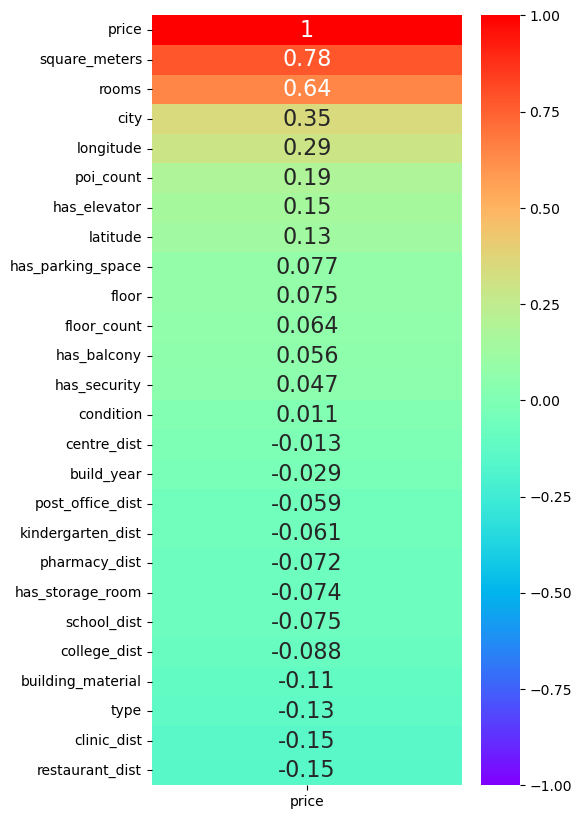

In [54]:
top_features = data.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [55]:
data.drop(columns = ["has_parking_space","floor", "floor_count", "has_balcony","has_security","condition","type", "build_year", "centre_dist", "school_dist", "clinic_dist", "post_office_dist", "kindergarten_dist", "restaurant_dist", "college_dist", "pharmacy_dist", "building_material", "has_storage_room"], inplace = True)

## Target variable ##

I’m going to train the model to predict the house rental price based on the above features...

In [58]:
#data['log_price'] = np.log(data['price'])

In [59]:
# Split features and target variabl
X = data.drop(columns=["price"])  # Replace 'target_column' with actual name
y = data['price']

In [136]:
sizes = [0.1, 0.15, 0.25]
results = {}

for split_size in sizes:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split_size, random_state=42)

In [124]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2212, 7)
x_test shape:  (6637, 7)
y_train shape:  (2212,)
y_test shape:  (6637,)


In [ ]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [126]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [134]:
# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append([name, mae, mse, rmse, r2])

# Create a DataFrame to display the results
results_data = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])
print(results_data)

               Model         MAE           MSE         RMSE  R2 Score
0  Linear Regression  897.136457  1.659351e+06  1288.157875  0.693286
1      Decision Tree  862.597710  2.037337e+06  1427.353062  0.623420
2      Random Forest  662.521384  1.101811e+06  1049.671775  0.796342


In [130]:
# Store results
results = []

# Train and evaluate models using cross-validation for R² Score
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Using R² for scoring
    mean_cv_score = cv_scores.mean()  # Mean R² score
    
    # Train the model on the full dataset for predictions
    model.fit(X, y)
    
    # Store results
    results.append([name, mean_cv_score])

# Create a DataFrame to display the results
results_data = pd.DataFrame(results, columns=["Model", "Mean CV R² Score"])
print("\nModel Performance Metrics using Cross-Validation for R² Score:")
print(results_data)


Model Performance Metrics using Cross-Validation for R² Score:
               Model  Mean CV R² Score
0  Linear Regression          0.218585
1      Decision Tree          0.267544
2      Random Forest          0.540710


In [ ]:
# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Mean CV R² Score"])
print("\nModel Performance Metrics using Cross-Validation for R² Score:")
print(results_df)

# To demonstrate predictions and plot results, let's still split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Predict on the test set for final evaluation
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Plotting actual vs predicted for each model vertically with smaller size
plt.figure(figsize=(6, 10))  # Adjusted size for a more compact vertical layout

for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(3, 1, i + 1)  # 3 rows, 1 column
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.title(f'{name} Predictions')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso  # Lasso for regularization
from sklearn.model_selection import GridSearchCV

# Define features and target variable
X = data.drop(columns='price')  # Features (age, sex, bmi, etc.)
y = data['price']  # Target (insurance charges)

# Set up parameter grids for each model
param_grid = {
    'Linear Regression': {'alpha': [0.01, 0.1, 1.0, 10.0]},  # Lasso regularization parameter
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},  # Maximum depth of the tree
    'Random Forest': {'n_estimators': [50, 100, 200]}  # Number of trees in the forest
}

# Models
models = {
    "Linear Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Store results
results = []

# Grid Search for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='r2')  # 5-fold CV for R²
    grid_search.fit(X, y)
    
    # Best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Store results
    results.append([name, best_params, best_score])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Best Parameters", "Best CV R² Score"])
print("\nBest Hyperparameters and Scores from Grid Search:")
print(results_df)

In [ ]:
## Random Forest ##

MODEL CREATION¶
To solve the problem and predict house rents I have decided to use random forest and linear regression.

In [ ]:
#create object from RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
# fit model
model.fit(X_train,y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
predict = model.predict(X_test)

In [ ]:
# Plot results
plt.plot(y_test.to_numpy()[:50])
plt.plot(predict[:50])
plt.show()

In [ ]:
# see score
r2_score(predict, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error 

rms = mean_squared_error(y_test, predict, squared=False)
print(rms)

In [ ]:
plt.scatter(y_test, predict)
plt.show()

Random Forest considers output from every single tree. This is a simple implementation without any hyperparameters tuning and at first, it looks as if the performance is similar to Decision Tree implemented before. Let’s see how it performs in general.
I started with RF as the first algorithm. It looks really good on the example plot as the model’s predictions mostly cover house prices

That means that the accuracy reached the level of 83% and on average, the error of the prediction should be within the range of 856 PLN from the real price. It depends on our expectations of how acceptable this difference is. In my opinion, for estimation purposes those values are acceptable.

The Mean Absolute Error is 856 which means that most predictions should differ from the real price up to 856PLN. That’s actually a satisfying result.

## LINEAR REGRESSION

In [ ]:
#build and train a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
plt.scatter(lr.predict(X_train), y_train)
plt.xlabel('Predicted value of Y')
plt.ylabel('Real value of Y')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
# Predict
result = lr.predict(X_test)

In [ ]:
# Plot results
plt.plot(y_test.to_numpy()[:50])
plt.plot(result[:50])
plt.show()

In [ ]:
# see score
r2_score(result, y_test)

In [ ]:
rms = mean_squared_error(y_test, result, squared=False)
print(rms)

Linear Regression seems to be less accurate than the other algorithms for our dataset. Let’s remember that Linear Regression expects linear dependency between features and if there are some non-linear relationships, this algorithm might struggle to capture those relations.

The accuracy level is 61% which is much less in comparison with Random Forest. It is worth mentioning that the Linear Regression algorithm is much more sensitive to outliers in the dataset. would have to clean the data with much more precision but at the same time, we might have lost some data regarding particular houses

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
deTree = DecisionTreeRegressor()
deTree.fit(X_train, y_train)

In [ ]:
deTree.score(X_train, y_train)

In [ ]:
# Predict
dt_pred = deTree.predict(X_test)

In [ ]:
# Plot results
plt.plot(y_test.to_numpy()[:50])
plt.plot(dt_pred[:50])
plt.show()

In [ ]:
# see score
r2_score(dt_pred, y_test)

In [ ]:
rms = mean_squared_error(y_test, dt_pred, squared=False)
print(rms)

Decision Trees are prone to overfitting so we should try to keep the dataset clean from the noise and the tree should not be too deep. Let’s see the performance measurements:

I visualized the data and analyzed it. The data was prepared for training and I compared Random Forest, Linear Regression and Decision Tree algorithms. In the end, the Random Forest algorithm appeared to be the best choice with over 83% accuracy.

In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
#grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
#grid_search.fit(X_train, y_train)
#print("Best Parameters:", grid_search.best_params_)